# Assignment: Amazon FBA Order Data Analysis

Your assignment is to answer the following questions from the brand about their Amazon account using Python and the appropriate libraries. Where appropriate, please include visualizations with explanations. Functions should include docstrings. All work can be done within the Jupyter Notebook, but feel free to create separate files to store functions if preferred.

Hint: Think about possible unique identifiers.

You may use any libraries you prefer. Your data is contained in the orders.csv and returns.csv files in the data folder.

In [2]:
"LOAD YOUR LIBRARIES HERE"
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [3]:
"LOAD YOUR DATA HERE"
orders = pd.read_csv('data/pbe-orders.csv')
returns = pd.read_csv('data/pbe-returns.csv')
orders = orders.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


### Before you begin: Get to know your dataset.

Check out the columns and values. Notice anything about the data types? Look at how columns may relate to each other. (Hint: Notice anything weird about the 'item-price' values?)

In [17]:
orders[orders['item-price'].isna() == True]

,Unnamed: 0,Unnamed: 0.1,amazon-order-id,merchant-order-id,shipment-id,shipment-item-id,amazon-order-item-id,merchant-order-item-id,purchase-date,payments-date,shipment-date,reporting-date,buyer-email,sku,quantity-shipped,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,ship-service-level,recipient-name,ship-address-2,ship-address-3,ship-city,ship-state,ship-postal-code,ship-country,ship-phone-number,bill-address-1,bill-address-2,bill-address-3,bill-city,bill-state,bill-postal-code,bill-country,item-promotion-discount,ship-promotion-discount,carrier,tracking-number,estimated-arrival-date,fulfillment-center-id,fulfillment-channel,sales-channel


In [8]:
orders.head()

,amazon-order-id,merchant-order-id,shipment-id,shipment-item-id,amazon-order-item-id,merchant-order-item-id,purchase-date,payments-date,shipment-date,reporting-date,buyer-email,sku,quantity-shipped,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,ship-service-level,recipient-name,ship-address-2,ship-address-3,ship-city,ship-state,ship-postal-code,ship-country,ship-phone-number,bill-address-1,bill-address-2,bill-address-3,bill-city,bill-state,bill-postal-code,bill-country,item-promotion-discount,ship-promotion-discount,carrier,tracking-number,estimated-arrival-date,fulfillment-center-id,fulfillment-channel,sales-channel
0,113-0579650-0481014,NaN,DH7DZNqN3,D7fc5sHtR,4.270000e+12,NaN,2020-01-02T01:11:38+00:00,2020-01-03T10:31:23+00:00,2020-01-03T10:31:25+00:00,2020-01-03T11:31:31+00:00,gxjksfsm737p9py@marketplace.amazon.com,PB-AA,1,USD,29.99,2.23,0.0,0.0,0.0,0.0,Expedited,Ryan Kirkland,NaN,NaN,SOUTH SALT LAKE,UT,84115-3307,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA587335217000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
1,111-3082907-3413041,NaN,D4PrCzqF3,DHYmgwHNR,4.940000e+13,NaN,2020-01-02T01:12:11+00:00,2020-01-02T20:45:43+00:00,2020-01-02T20:45:43+00:00,2020-01-02T23:45:49+00:00,hj2l7qlggyk9rdk@marketplace.amazon.com,PB-AA,1,USD,29.99,3.00,0.0,0.0,0.0,0.0,Expedited,Laura Nicklay,NaN,NaN,AUBURN,WA,98001-2513,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA583523516000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
2,111-0252737-4993075,NaN,DskBxB95M,DkpSJgzzR,1.880000e+13,NaN,2020-01-07T22:58:32+00:00,2020-01-08T17:39:42+00:00,2020-01-08T16:55:02+00:00,2020-01-08T17:55:08+00:00,4mptds73qpw0chc@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,Christopher Arp,NaN,NaN,IOWA CITY,IA,52245-7801,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z9Y97F00375670720,2020-01-10T04:00:00+00:00,MKC6,AFN,Amazon.com
3,114-3125779-9788249,NaN,DvYsqPS3P,Dtw6jjfmR,4.120000e+13,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AAA,1,USD,24.99,1.50,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com
4,114-3125779-9788249,NaN,DvYsqPS3P,DHwzjjfmR,6.180000e+12,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com


In [8]:
returns.head()

,Unnamed: 0,return-date,order-id,sku,asin,fnsku,quantity,fulfillment-center-id,detailed-disposition,reason,status,license-plate-number,customer-comments
0,0,2020-07-10T10:22:18+00:00,113-5704183-7856203,PB-AA,B08268F6XN,B08268F6XN,1,LAS2,DEFECTIVE,MISSING_PARTS,Reimbursed,LPNPM202475979,cable missing
1,1,2020-07-10T07:21:36+00:00,113-5681279-7985840,PB-AA,B08268F6XN,B08268F6XN,1,LAS2,CUSTOMER_DAMAGED,SWITCHEROO,Reimbursed,LPNPM208340778,NaN
2,2,2020-07-08T20:16:58+00:00,114-5172772-0242637,PB-AAA,B08267BBJT,B08267BBJT,1,IND8,DEFECTIVE,DEFECTIVE,Unit returned to inventory,LPNN718303584,1 of the 4 batteries is 0.0v (dead on arrival).
3,3,2020-07-08T07:40:43+00:00,111-5918530-7037818,PB-AA,B08268F6XN,B08268F6XN,1,LAS2,CUSTOMER_DAMAGED,SWITCHEROO,Unit returned to inventory,LPNPM202301175,NaN
4,4,2020-07-03T11:16:59+00:00,114-8687774-9880227,PB-AAA,B08267BBJT,B08267BBJT,1,LEX2,SELLABLE,UNDELIVERABLE_UNKNOWN,Unit returned to inventory,LPNPM192580062,NaN


### Question 1: How much revenue have we made this year?

In [18]:
orders['item-price'].sum()

106672.59000000001

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        106672.59
    </p>
</details>

### Question 2: What is our best selling SKU year-to-date?

Please provide the appropriate visual.

In [24]:
best_sku = orders[['sku', 'item-price']].groupby('sku').agg('sum').sort_values('item-price', ascending=False)
best_sku.head()

,item-price
sku,
PB-AAA,45231.90
PB-AA,41926.02
PB-SB2,8051.55
PB-DBAT,5578.14
PB-9VBAT,5047.98


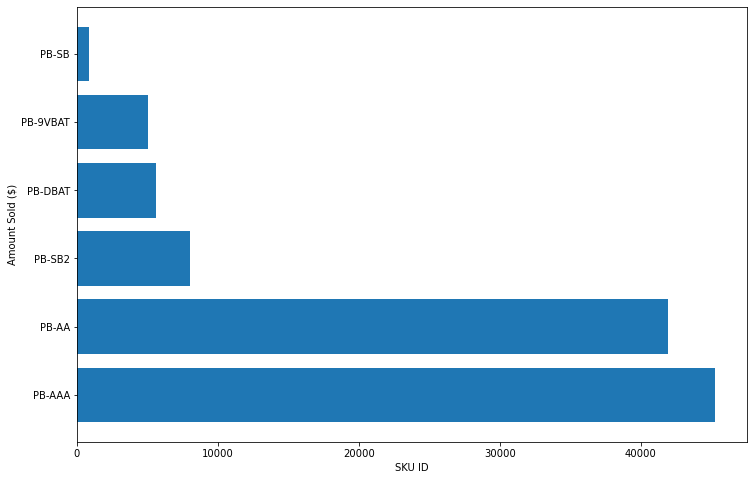

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(best_sku.index, best_sku['item-price'])
ax.set_ylabel('Amount Sold ($)')
ax.set_xlabel('SKU ID');

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        PB-AAA (A visual showing all SKU sales would be helpful here)
    </p>
</details>

### Question 3: What is our most returned SKU YTD?

Please provide the appropriate visual.

<BarContainer object of 4 artists>

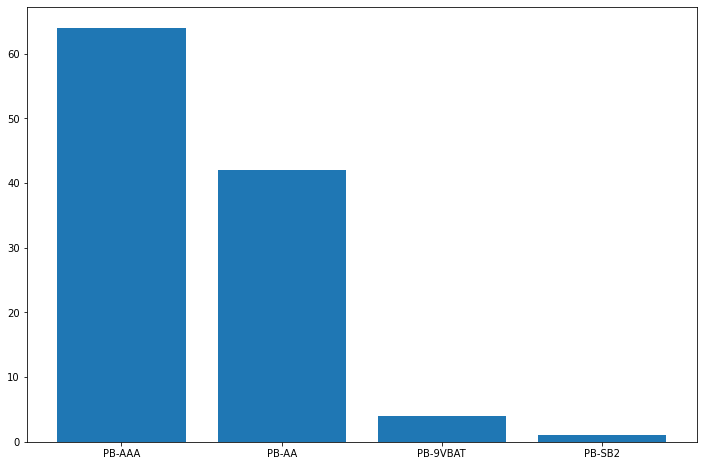

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(returns[['sku', 'quantity']].groupby('sku').agg('sum').sort_values('quantity', ascending=False).index, 
      returns[['sku', 'quantity']].groupby('sku').agg('sum').sort_values('quantity', ascending=False)['quantity'])

In [34]:
returns[['sku', 'quantity']].groupby('sku').agg('sum').sort_values('quantity', ascending=False)

,quantity
sku,
PB-AAA,64
PB-AA,42
PB-9VBAT,4
PB-SB2,1


<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        PB-AAA (A visual showing all SKU sales would be helpful here)
    </p>
</details>

### Question 4: What is our overall return rate?

In [37]:
returns['quantity'].sum() / orders['quantity-shipped'].sum()

0.02975871313672922

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        0.0297
    </p>
</details>

### Question 5: What is our return rate per product?

Please provide the appropriate visual.

In [7]:
shipped = orders[['sku', 'quantity-shipped']].groupby('sku').agg('count')
returned = returns[['sku', 'quantity']].groupby('sku').agg('count')
shipped

,quantity-shipped
sku,
PB-9VBAT,180
PB-AA,1243
PB-AAA,1644
PB-DBAT,169
PB-SB,8
PB-SB2,89


In [8]:
returned

,quantity
sku,
PB-9VBAT,4
PB-AA,42
PB-AAA,64
PB-SB2,1


In [13]:
shipped_returned = shipped.join(returned, how='outer')
shipped_returned = shipped_returned.fillna(0)
shipped_returned

,quantity-shipped,quantity
sku,,
PB-9VBAT,180,4.0
PB-AA,1243,42.0
PB-AAA,1644,64.0
PB-DBAT,169,0.0
PB-SB,8,0.0
PB-SB2,89,1.0


In [21]:
shipped_returned['return_rate'] = shipped_returned['quantity'] / shipped_returned['quantity-shipped']
shipped_returned = shipped_returned.sort_values('return_rate', ascending=False)

Text(0, 0.5, 'Return Rate')

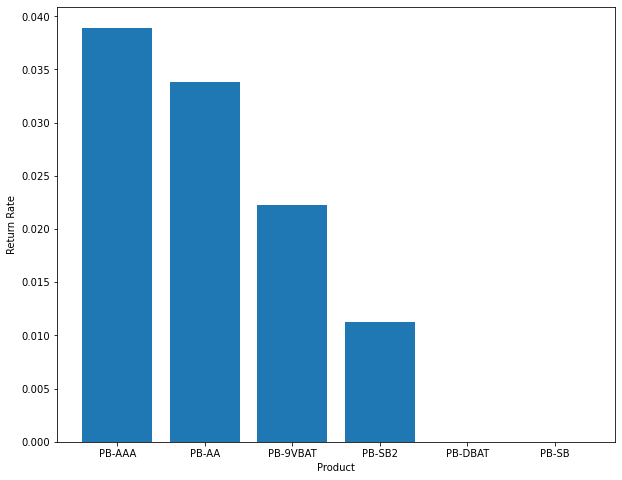

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(shipped_returned.index, shipped_returned['return_rate'])
ax.set_xlabel('Product')
ax.set_ylabel('Return Rate')

<details>
    <summary>
        Expected Result:
    </summary>
    
            - PB-9VBAT	0.019608
            - PB-AA	0.029830
            - PB-AAA	0.035011
            - PB-DBAT	0.000000
            - PB-SB	0.000000
            - PB-SB2	0.010638
</details>

### Question 6: How many unique customers do we have?

In [45]:
len(orders.groupby('buyer-email'))

2398

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        2398
    </p>
</details>

### Question 7: How do sales look over time YTD? What were our 5 best selling days by units?

Please provide visuals of sales over time by day and our best 5 days.

In [9]:
orders.head()

,amazon-order-id,merchant-order-id,shipment-id,shipment-item-id,amazon-order-item-id,merchant-order-item-id,purchase-date,payments-date,shipment-date,reporting-date,buyer-email,sku,quantity-shipped,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,ship-service-level,recipient-name,ship-address-2,ship-address-3,ship-city,ship-state,ship-postal-code,ship-country,ship-phone-number,bill-address-1,bill-address-2,bill-address-3,bill-city,bill-state,bill-postal-code,bill-country,item-promotion-discount,ship-promotion-discount,carrier,tracking-number,estimated-arrival-date,fulfillment-center-id,fulfillment-channel,sales-channel
0,113-0579650-0481014,NaN,DH7DZNqN3,D7fc5sHtR,4.270000e+12,NaN,2020-01-02T01:11:38+00:00,2020-01-03T10:31:23+00:00,2020-01-03T10:31:25+00:00,2020-01-03T11:31:31+00:00,gxjksfsm737p9py@marketplace.amazon.com,PB-AA,1,USD,29.99,2.23,0.0,0.0,0.0,0.0,Expedited,Ryan Kirkland,NaN,NaN,SOUTH SALT LAKE,UT,84115-3307,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA587335217000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
1,111-3082907-3413041,NaN,D4PrCzqF3,DHYmgwHNR,4.940000e+13,NaN,2020-01-02T01:12:11+00:00,2020-01-02T20:45:43+00:00,2020-01-02T20:45:43+00:00,2020-01-02T23:45:49+00:00,hj2l7qlggyk9rdk@marketplace.amazon.com,PB-AA,1,USD,29.99,3.00,0.0,0.0,0.0,0.0,Expedited,Laura Nicklay,NaN,NaN,AUBURN,WA,98001-2513,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA583523516000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
2,111-0252737-4993075,NaN,DskBxB95M,DkpSJgzzR,1.880000e+13,NaN,2020-01-07T22:58:32+00:00,2020-01-08T17:39:42+00:00,2020-01-08T16:55:02+00:00,2020-01-08T17:55:08+00:00,4mptds73qpw0chc@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,Christopher Arp,NaN,NaN,IOWA CITY,IA,52245-7801,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z9Y97F00375670720,2020-01-10T04:00:00+00:00,MKC6,AFN,Amazon.com
3,114-3125779-9788249,NaN,DvYsqPS3P,Dtw6jjfmR,4.120000e+13,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AAA,1,USD,24.99,1.50,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com
4,114-3125779-9788249,NaN,DvYsqPS3P,DHwzjjfmR,6.180000e+12,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com


In [22]:
orders['purchase-date'][0][0:10]

'2020-01-02'

In [25]:
a = pd.to_datetime('2020-01-02')

In [16]:
payment_date

0       2020-01-03 10:31:23+00:00
1       2020-01-02 20:45:43+00:00
2       2020-01-08 17:39:42+00:00
3       2020-01-09 17:28:34+00:00
4       2020-01-09 17:28:34+00:00
                  ...            
3328    2020-11-30 12:40:41-08:00
3329    2020-11-30 09:55:00-08:00
3330    2020-11-30 09:28:24-08:00
3331    2020-11-30 09:25:17-08:00
3332    2020-11-30 09:08:11-08:00
Name: payments-date, Length: 3333, dtype: object

<details>
    <summary>
        Expected Result:
    </summary>
    
    - 2020-11-16     37
    - 2020-11-02     37
    - 2020-11-28     37
    - 2020-10-14     70
    - 2020-10-13    127
</details>

In [ ]:
orders['qu']

### Question 8: Where are the majority of our units sold being shipped?

This will require some data cleaning. I would like to see data aggreggated by state - bonus points if you're able to provide a visual.

In [4]:
orders['ship-state'] = orders['ship-state'].str.upper()

In [7]:
orders['ship-state'][orders['ship-state'].apply(lambda x: len(x)>2) == True]

Series([], Name: ship-state, dtype: object)

## Reduce down to state abbrvs

In [6]:
orders['ship-state'] = orders['ship-state'].replace({'FLORIDA':'FL', 'OREGON': 'OR',
                                                     'NEW YORK':'NY', 'MARYLAND': 'MD',
                                                    'OHIO': 'OH', 'NORTH CAROLINA': 'NC',
                                                    'NEVADA': 'NV', 'UTAH': 'UT',
                                                    'N. J.': 'NJ', 'CALIFORNIA': 'CA',
                                                    'ARIZONA': 'AZ', 'TEXAS': 'TX',
                                                    'PENNSYLVANIA': 'PA', 'NORTH DAKOTA': 'ND',
                                                    'WASHINGTON': 'WA', 'MISSOURI': 'MO',
                                                    'MASSACHUSETTS': 'MA', 'CONNECTICUT': 'CT',
                                                    'NEW JERSEY': 'NJ', 'WI.': 'WI',
                                                    'MINNESOTA': 'MN', 'OKLAHOMA': 'OK',
                                                    'IDAHO': 'ID', 'ILLINOIS': 'IL',
                                                    'MAINE': 'ME', 'MICHIGAN': 'MI',
                                                    'COLORADO': 'CO', 'KENTUCKY': 'KY',
                                                    'DELAWARE': 'DE', 'NEW MEXICO': 'NM',
                                                    'WISCONSIN': 'WI', 'WEST VIRGINIA': 'WV',
                                                    'GEORGIA': 'GA', 'TENNESSEE': 'TN',
                                                     'LOUISIANA': 'LA', 'SOUTH CAROLINA': 'SC',
                                                     'KANSAS': 'KS', 'IOWA': 'IA',
                                                     'INDIANA': 'IN'
                                                    })
orders['ship-state'][orders['ship-state'].apply(lambda x: len(x)>2) == True].count()

0

In [70]:
shipped_to_state = orders[['ship-state', 'quantity-shipped']].groupby('ship-state').agg('count').sort_values(by='quantity-shipped', ascending=False)

<ipython-input-74-e705024faede>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(shipped_to_state.index, rotation=45, ha='right')


Text(0, 0.5, 'Amount Shipped')

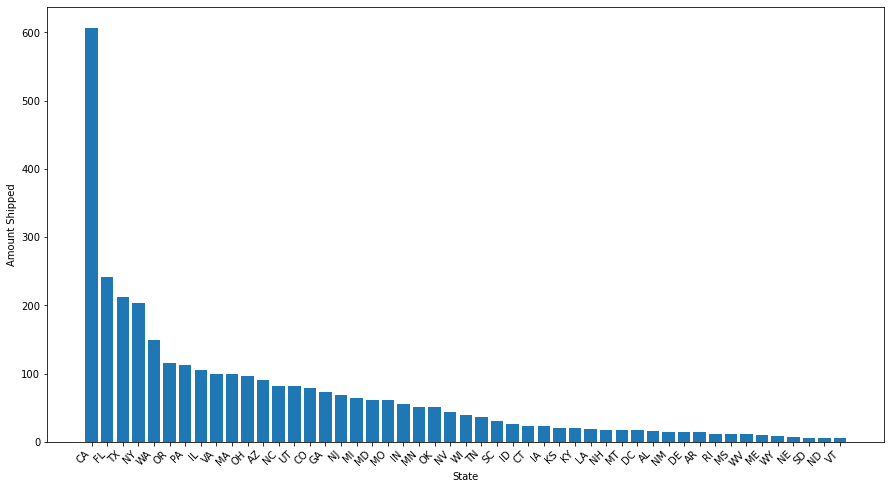

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(shipped_to_state.index, shipped_to_state['quantity-shipped'])
ax.set_xlabel('State')
ax.set_xticklabels(shipped_to_state.index, rotation=45, ha='right')
ax.set_ylabel('Amount Shipped')


In [37]:
orders[['ship-state', 'quantity-shipped']].groupby('ship-state').agg('sum')

,quantity-shipped
ship-state,
AL,18
AR,16
ARIZONA,6
AZ,88
CA,631
...,...
WI,41
WI.,1
WISCONSIN,1


<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        CA, FL, TX, NY, WA 
    </p>
</details>

### Question 9: What percentage of our customers have purchased more than one unit?

In [8]:
orders.head()

,amazon-order-id,merchant-order-id,shipment-id,shipment-item-id,amazon-order-item-id,merchant-order-item-id,purchase-date,payments-date,shipment-date,reporting-date,buyer-email,sku,quantity-shipped,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,ship-service-level,recipient-name,ship-address-2,ship-address-3,ship-city,ship-state,ship-postal-code,ship-country,ship-phone-number,bill-address-1,bill-address-2,bill-address-3,bill-city,bill-state,bill-postal-code,bill-country,item-promotion-discount,ship-promotion-discount,carrier,tracking-number,estimated-arrival-date,fulfillment-center-id,fulfillment-channel,sales-channel
0,113-0579650-0481014,NaN,DH7DZNqN3,D7fc5sHtR,4.270000e+12,NaN,2020-01-02T01:11:38+00:00,2020-01-03T10:31:23+00:00,2020-01-03T10:31:25+00:00,2020-01-03T11:31:31+00:00,gxjksfsm737p9py@marketplace.amazon.com,PB-AA,1,USD,29.99,2.23,0.0,0.0,0.0,0.0,Expedited,Ryan Kirkland,NaN,NaN,SOUTH SALT LAKE,UT,84115-3307,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA587335217000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
1,111-3082907-3413041,NaN,D4PrCzqF3,DHYmgwHNR,4.940000e+13,NaN,2020-01-02T01:12:11+00:00,2020-01-02T20:45:43+00:00,2020-01-02T20:45:43+00:00,2020-01-02T23:45:49+00:00,hj2l7qlggyk9rdk@marketplace.amazon.com,PB-AA,1,USD,29.99,3.00,0.0,0.0,0.0,0.0,Expedited,Laura Nicklay,NaN,NaN,AUBURN,WA,98001-2513,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,AMZN_US,TBA583523516000,2020-01-05T04:00:00+00:00,SMF1,AFN,Amazon.com
2,111-0252737-4993075,NaN,DskBxB95M,DkpSJgzzR,1.880000e+13,NaN,2020-01-07T22:58:32+00:00,2020-01-08T17:39:42+00:00,2020-01-08T16:55:02+00:00,2020-01-08T17:55:08+00:00,4mptds73qpw0chc@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,Christopher Arp,NaN,NaN,IOWA CITY,IA,52245-7801,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z9Y97F00375670720,2020-01-10T04:00:00+00:00,MKC6,AFN,Amazon.com
3,114-3125779-9788249,NaN,DvYsqPS3P,Dtw6jjfmR,4.120000e+13,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AAA,1,USD,24.99,1.50,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com
4,114-3125779-9788249,NaN,DvYsqPS3P,DHwzjjfmR,6.180000e+12,NaN,2020-01-08T19:47:14+00:00,2020-01-09T17:28:34+00:00,2020-01-09T17:28:34+00:00,2020-01-09T20:28:41+00:00,dtqdshhw0zj2lm6@marketplace.amazon.com,PB-AA,1,USD,29.99,1.80,0.0,0.0,0.0,0.0,Expedited,RYAN MCCONNELL,NaN,NaN,BATH,PA,18014-1631,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,UPS,1Z09271R0314650953,2020-01-11T04:00:00+00:00,JFK8,AFN,Amazon.com


In [13]:
customers = orders[['buyer-email', 'quantity-shipped']].groupby('buyer-email').agg('count').sort_values('quantity-shipped', ascending=False)
customers_more_one = customers[customers['quantity-shipped'] > 1].count()
# customers_one = len(customers) - len(customers_more_one)
customers_more_one / len(customers)

quantity-shipped    0.250626
dtype: float64

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        0.303
    </p>
</details>

### Question 10: What percentage of our customers have ordered on more than one occasion? (What is our repeat buyer rate?)

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        0.133
    </p>
</details>

### Question 11: What is our average customer lifetime value of a repeat buyer?

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        90.938
    </p>
</details>

### Question 12: How long does it take for our repeat buyers to purchase their second order?

<details>
    <summary>
        Expected Result:
    </summary>
    <p>
        106672.59
    </p>
</details>